# Problem 2: Sectoral Segmentation

#### Step 1: Import necessary libraries

In [230]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
pd.set_option('display.float_format', '{:.2f}'.format)

#### Step 2: Load data from Excel file

In [170]:
df = pd.read_excel("FinancialComapnies.xlsx")

In [172]:
df.head()

,S.No.,Name,CMP Rs.,Cur Assets Rs.Cr.,Cur Liab Rs.Cr.,Debt / Eq,Inven TO,ROE %,OPM %,P/E,B.V. Rs.,No. Eq. Shares Cr.,Asset Turnover,WC to Sales %,Dividend Payout %,Mar Cap Rs.Cr.
0,1,HDFC Bank,1651.00,436715.50,174832.07,6.81,NaN,17.14,33.60,18.48,600.76,763.08,0.09,83.40,23.12,1259841.50
1,2,ICICI Bank,1223.00,254098.30,161704.49,6.45,NaN,18.80,34.44,19.02,364.76,704.66,0.07,55.33,15.87,861801.94
2,3,St Bk of India,799.75,780703.07,304771.04,13.51,NaN,17.34,47.05,9.79,464.94,892.46,0.07,104.38,18.23,713745.84
3,4,Kotak Mah. Bank,1882.40,86727.38,43945.30,4.00,NaN,15.06,15.88,20.08,653.81,198.81,0.08,72.26,2.18,374252.02
4,5,Axis Bank,1172.45,174989.54,65413.62,8.25,NaN,18.40,62.96,13.57,508.73,309.34,0.08,93.12,1.17,362679.84


In [343]:
df.describe()

,SNo,CMPRs,Cur AssetsRsCr,Cur LiabRsCr,Debt / Eq,Inven TO,ROE%,OPM%,P/E,BVRs,No Eq SharesCr,Asset Turnover,WC to Sales%,Dividend Payout%,Mar CapRsCr,Cluster
count,41.00,41.00,41.00,41.00,41.00,0.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00,41.00
mean,21.00,347.78,76900.03,29445.96,9.10,NaN,14.09,36.09,15.34,197.34,461.72,0.09,103.78,10.82,121149.95,0.15
std,11.98,466.08,142604.97,59021.29,2.94,NaN,5.23,127.15,12.34,198.83,614.44,0.03,74.47,8.42,255712.82,0.36
min,1.00,21.40,1423.65,147.87,3.30,NaN,3.18,-754.45,5.37,14.32,4.51,0.05,28.27,0.00,900.72,0.00
25%,11.00,56.96,4898.20,2043.64,6.81,NaN,10.82,47.05,6.97,45.65,60.77,0.07,57.83,2.18,7156.69,0.00
50%,21.00,153.90,23764.08,5958.13,8.32,NaN,14.42,58.49,10.27,124.83,193.42,0.08,95.14,10.94,41718.99,0.00
75%,31.00,412.30,77136.73,24335.36,11.64,NaN,17.14,65.95,18.48,265.84,763.08,0.09,123.76,18.23,89546.01,0.00
max,41.00,1882.40,780703.07,304771.04,14.87,NaN,26.66,70.60,56.63,806.83,3134.69,0.16,484.63,27.87,1259841.50,1.00


### Step 3: Select the relevant columns for clustering (dropping the non-numerical 'Name' and 'S.No.' columns and NaN column 'Inven TO')

- Format colum names and remove junk charectars
- Drop Non Numeric Column - Name
- Drop Null column Inven TO
- Drop Serial Number

In [174]:
print(df.columns.tolist())

['S.No.', 'Name', 'CMP\xa0Rs.', 'Cur Assets\xa0Rs.Cr.', 'Cur Liab\xa0Rs.Cr.', 'Debt / Eq', 'Inven TO', 'ROE\xa0%', 'OPM\xa0%', 'P/E', 'B.V.\xa0Rs.', 'No. Eq. Shares\xa0Cr.', 'Asset Turnover', 'WC to Sales\xa0%', 'Dividend Payout\xa0%', 'Mar Cap\xa0Rs.Cr.\xa0']


In [182]:
df.columns = df.columns.str.replace('\xa0', '', regex=False)  # Remove periods from column names
df.columns = df.columns.str.replace('.', '', regex=False)  # Remove periods from column names
df.columns = df.columns.str.strip()  # Remove extra spaces from column names

In [184]:
print(df.columns.tolist())

['SNo', 'Name', 'CMPRs', 'Cur AssetsRsCr', 'Cur LiabRsCr', 'Debt / Eq', 'Inven TO', 'ROE%', 'OPM%', 'P/E', 'BVRs', 'No Eq SharesCr', 'Asset Turnover', 'WC to Sales%', 'Dividend Payout%', 'Mar CapRsCr']


In [188]:
data = df[[ 'CMPRs', 'Cur AssetsRsCr', 'Cur LiabRsCr', 'Debt / Eq', 'ROE%', 'OPM%', 'P/E', 'BVRs', 'No Eq SharesCr', 'Asset Turnover', 'WC to Sales%', 'Dividend Payout%', 'Mar CapRsCr']]

In [190]:
data.head()

,CMPRs,Cur AssetsRsCr,Cur LiabRsCr,Debt / Eq,ROE%,OPM%,P/E,BVRs,No Eq SharesCr,Asset Turnover,WC to Sales%,Dividend Payout%,Mar CapRsCr
0,1651.00,436715.50,174832.07,6.81,17.14,33.60,18.48,600.76,763.08,0.09,83.40,23.12,1259841.50
1,1223.00,254098.30,161704.49,6.45,18.80,34.44,19.02,364.76,704.66,0.07,55.33,15.87,861801.94
2,799.75,780703.07,304771.04,13.51,17.34,47.05,9.79,464.94,892.46,0.07,104.38,18.23,713745.84
3,1882.40,86727.38,43945.30,4.00,15.06,15.88,20.08,653.81,198.81,0.08,72.26,2.18,374252.02
4,1172.45,174989.54,65413.62,8.25,18.40,62.96,13.57,508.73,309.34,0.08,93.12,1.17,362679.84


### Step 4: Handle missing values (optional, depends on your data)

In [131]:
# Here we just drop rows with missing values
data = data.dropna()

In [135]:
data.head()

,CMPRs,Cur AssetsRsCr,Cur LiabRsCr,Debt / Eq,ROE%,OPM%,P/E,BVRs,No Eq SharesCr,Asset Turnover,WC to Sales%,Dividend Payout%,Mar CapRsCr
0,1651.00,436715.50,174832.07,6.81,17.14,33.60,18.48,600.76,763.08,0.09,83.40,23.12,1259841.50
1,1223.00,254098.30,161704.49,6.45,18.80,34.44,19.02,364.76,704.66,0.07,55.33,15.87,861801.94
2,799.75,780703.07,304771.04,13.51,17.34,47.05,9.79,464.94,892.46,0.07,104.38,18.23,713745.84
3,1882.40,86727.38,43945.30,4.00,15.06,15.88,20.08,653.81,198.81,0.08,72.26,2.18,374252.02
4,1172.45,174989.54,65413.62,8.25,18.40,62.96,13.57,508.73,309.34,0.08,93.12,1.17,362679.84


### Step 5: Standardize the data (important for distance-based methods)

In [242]:
scaler = StandardScaler()
data_scaled_standard = scaler.fit_transform(data)

In [244]:
# Look the first row
data_scaled_standard[0]

array([ 2.83088248,  2.55450699,  2.49388332, -0.78690048,  0.59057345,
       -0.01983638,  0.25789317,  2.05418226,  0.4965597 ,  0.01828181,
       -0.27710483,  1.47921198,  4.50832821])

In [236]:
scaler = MinMaxScaler()
data_scaled_minmax = scaler.fit_transform(data)

In [238]:
# Look the first row
data_scaled_minmax[0]

array([0.87565825, 0.5585825 , 0.57344358, 0.30337079, 0.59454855,
       0.95515423, 0.25575497, 0.73997804, 0.2423407 , 0.36363636,
       0.12080375, 0.82956584, 1.        ])

### Step 6: Compute the linkage matrix for hierarchical clustering

In [246]:
linkage_matrix = linkage(data_scaled_minmax, method='ward')

In [250]:
linkage_matrix

array([[19.        , 23.        ,  0.23827013,  2.        ],
       [ 9.        , 11.        ,  0.2426395 ,  2.        ],
       [22.        , 24.        ,  0.26346473,  2.        ],
       [34.        , 37.        ,  0.28050673,  2.        ],
       [25.        , 41.        ,  0.2911055 ,  3.        ],
       [26.        , 31.        ,  0.29385431,  2.        ],
       [ 6.        , 18.        ,  0.3025163 ,  2.        ],
       [33.        , 39.        ,  0.31604347,  2.        ],
       [ 5.        , 42.        ,  0.33422867,  3.        ],
       [35.        , 46.        ,  0.41222656,  3.        ],
       [29.        , 44.        ,  0.41424168,  3.        ],
       [27.        , 45.        ,  0.4547415 ,  4.        ],
       [43.        , 48.        ,  0.51023974,  4.        ],
       [50.        , 52.        ,  0.51215088,  7.        ],
       [14.        , 38.        ,  0.5127496 ,  2.        ],
       [12.        , 30.        ,  0.5221611 ,  2.        ],
       [28.        , 51.

### Step 7: Plot the dendrogram and elbo plot to visualize the clustering process

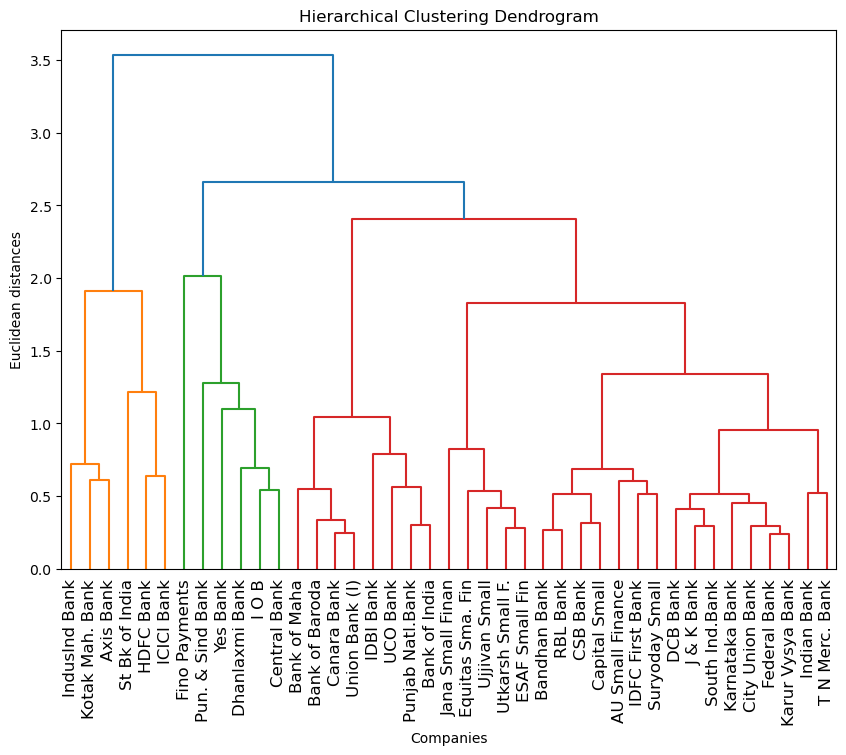

In [252]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df['Name'].values, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Companies')
plt.ylabel('Euclidean distances')
plt.show()

#### Elbo method to calculate Number of cluster

In [370]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

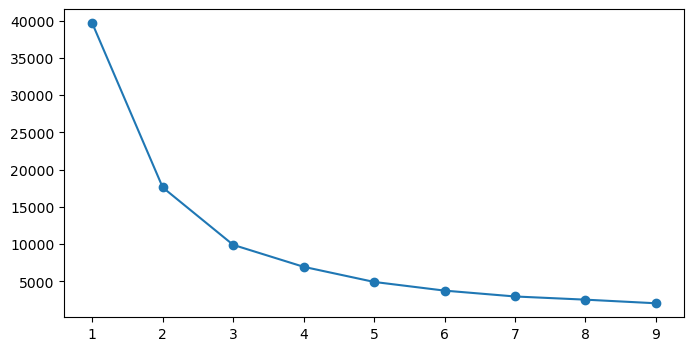

In [372]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( linkage_matrix )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

#### Evaluate quality of cluster by silhoutte score

In [3]:
import yellowbrik

ModuleNotFoundError: No module named 'yellowbrik'

In [1]:
im
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
num_clusters = [2, 3, 4, 5]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k, 
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, 
                                      colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(linkage_matrix) 

ModuleNotFoundError: No module named 'yellowbrick'

### Step 8: Apply Agglomerative Clustering (assuming 3 clusters, you can adjust based on the dendrogram)

In [349]:
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df['Cluster'] = cluster.fit_predict(data_scaled)

#### Trying different linkage methods

In [320]:
# Trying Complete Linkage
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
df['Cluster'] = cluster.fit_predict(data_scaled)

In [262]:
# Trying average Linkage
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
df['Cluster'] = cluster.fit_predict(data_scaled)

In [357]:
# Trying single Linkage
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
df['Cluster'] = cluster.fit_predict(data_scaled)

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

### Step 9: Check the results (which companies are in which cluster)

In [361]:
cluster_info = df[['Name', 'Cluster']].sort_values(df['Name'])

KeyError: 0            HDFC Bank
1           ICICI Bank
2       St Bk of India
3      Kotak Mah. Bank
4            Axis Bank
5       Bank of Baroda
6     Punjab Natl.Bank
7        IndusInd Bank
8                I O B
9          Canara Bank
10           IDBI Bank
11      Union Bank (I)
12         Indian Bank
13            Yes Bank
14     IDFC First Bank
15            UCO Bank
16    AU Small Finance
17        Central Bank
18       Bank of India
19        Federal Bank
20        Bank of Maha
21    Pun. & Sind Bank
22        Bandhan Bank
23    Karur Vysya Bank
24            RBL Bank
25     City Union Bank
26          J & K Bank
27      Karnataka Bank
28    Equitas Sma. Fin
29       Ujjivan Small
30      T N Merc. Bank
31      South Ind.Bank
32    Jana Small Finan
33            CSB Bank
34    Utkarsh Small F.
35            DCB Bank
36       Fino Payments
37      ESAF Small Fin
38      Suryoday Small
39       Capital Small
40      Dhanlaxmi Bank
Name: Name, dtype: object

In [359]:
print(df[['Name', 'Cluster']])

                Name  Cluster
0          HDFC Bank        1
1         ICICI Bank        1
2     St Bk of India        1
3    Kotak Mah. Bank        1
4          Axis Bank        1
5     Bank of Baroda        3
6   Punjab Natl.Bank        3
7      IndusInd Bank        1
8              I O B        0
9        Canara Bank        3
10         IDBI Bank        3
11    Union Bank (I)        3
12       Indian Bank        2
13          Yes Bank        0
14   IDFC First Bank        2
15          UCO Bank        3
16  AU Small Finance        2
17      Central Bank        0
18     Bank of India        3
19      Federal Bank        2
20      Bank of Maha        3
21  Pun. & Sind Bank        0
22      Bandhan Bank        2
23  Karur Vysya Bank        2
24          RBL Bank        2
25   City Union Bank        2
26        J & K Bank        2
27    Karnataka Bank        2
28  Equitas Sma. Fin        2
29     Ujjivan Small        2
30    T N Merc. Bank        2
31    South Ind.Bank        2
32  Jana S

In [353]:
# Step 1: Count the number of companies in each cluster
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

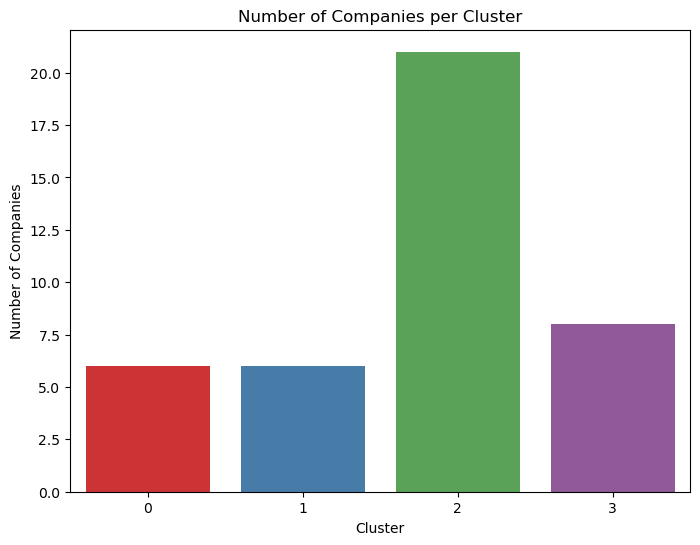

In [355]:
# Step 2: Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Count', data=cluster_counts, palette='Set1')
plt.title('Number of Companies per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Companies')
plt.show()

### Step 10: Visualize the clusters in a pairplot

C:\Users\Smita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Smita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Smita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Smita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

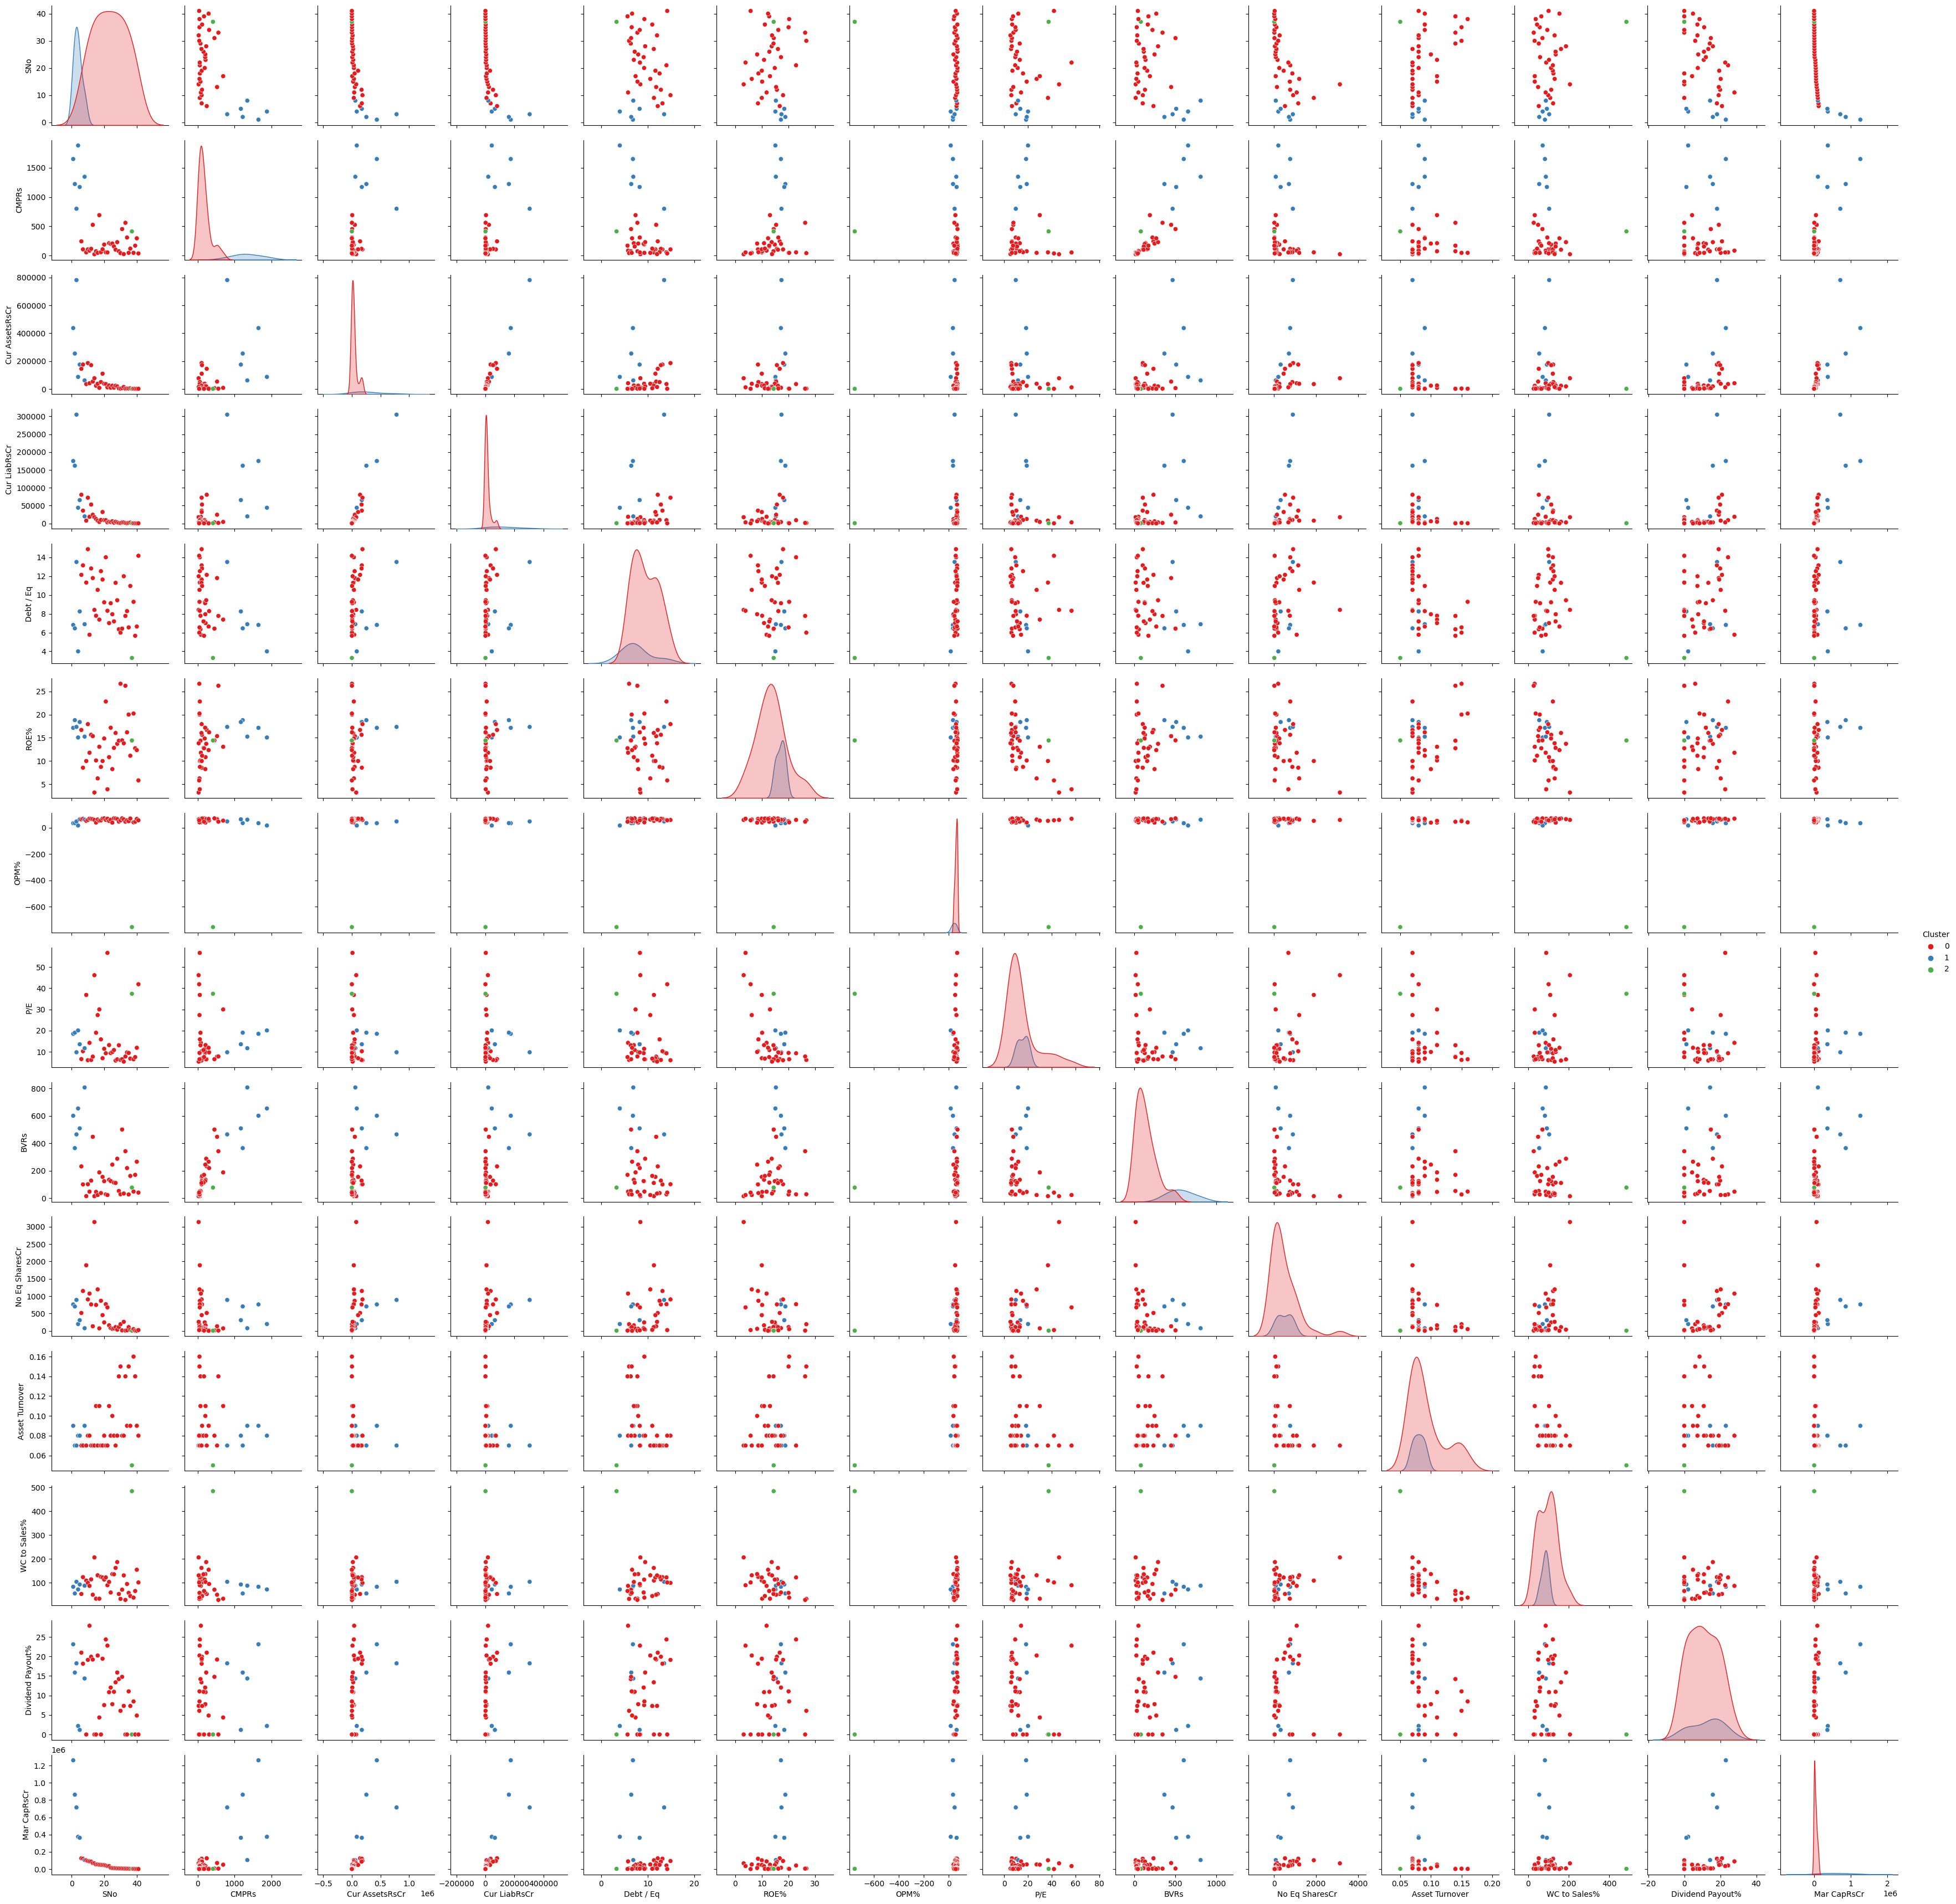

In [157]:
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='Set1')
plt.show()

### Appendix I: Tried different clustering mechanisms

In [292]:
# List to store the clustering results
results = {}

# Combination 1: Ward Linkage with Euclidean metric
ward_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
results['Ward (Euclidean)'] = ward_clustering.fit_predict(data_scaled)

# Combination 2: Complete Linkage with Euclidean metric
complete_clustering_euclidean = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean')
results['Complete (Euclidean)'] = complete_clustering_euclidean.fit_predict(data_scaled)

# Combination 3: Complete Linkage with Manhattan metric
complete_clustering_manhattan = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='manhattan')
results['Complete (Manhattan)'] = complete_clustering_manhattan.fit_predict(data_scaled)

# Combination 4: Complete Linkage with Cosine metric
complete_clustering_cosine = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='cosine')
results['Complete (Cosine)'] = complete_clustering_cosine.fit_predict(data_scaled)

# Combination 5: Average Linkage with Euclidean metric
average_clustering_euclidean = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='euclidean')
results['Average (Euclidean)'] = average_clustering_euclidean.fit_predict(data_scaled)

# Combination 6: Average Linkage with Manhattan metric
average_clustering_manhattan = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='manhattan')
results['Average (Manhattan)'] = average_clustering_manhattan.fit_predict(data_scaled)

# Combination 7: Average Linkage with Cosine metric
average_clustering_cosine = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='cosine')
results['Average (Cosine)'] = average_clustering_cosine.fit_predict(data_scaled)

# Combination 8: Average Linkage with Jaccard metric
# Note: Jaccard is generally used for binary data
average_clustering_jaccard = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='precomputed')
# To use Jaccard, you would need to create a Jaccard distance matrix manually

# Combination 9: Single Linkage with Euclidean metric
single_clustering_euclidean = AgglomerativeClustering(n_clusters=3, linkage='single', affinity='euclidean')
results['Single (Euclidean)'] = single_clustering_euclidean.fit_predict(data_scaled)

# Combination 10: Single Linkage with Manhattan metric
single_clustering_manhattan = AgglomerativeClustering(n_clusters=3, linkage='single', affinity='manhattan')
results['Single (Manhattan)'] = single_clustering_manhattan.fit_predict(data_scaled)

# Combination 11: Single Linkage with Cosine metric
single_clustering_cosine = AgglomerativeClustering(n_clusters=3, linkage='single', affinity='cosine')
results['Single (Cosine)'] = single_clustering_cosine.fit_predict(data_scaled)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


   Ward (Euclidean)  Complete (Euclidean)  Complete (Manhattan)  \
0                 1                     1                     1   
1                 2                     2                     2   
2                 0                     0                     0   

   Complete (Cosine)  Average (Euclidean)  Average (Manhattan)  \
0                  1                    1                    1   
1                  2                    2                    2   
2                  0                    0                    0   

   Average (Cosine)  Single (Euclidean)  Single (Manhattan)  Single (Cosine)  
0                 1                   1                   1                1  
1                 0                   2                   2                2  
2                 0                   0                   0                0  


C:\Users\Smita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Smita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Smita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Smita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Smita\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 